**Инструкция по выполнению**

1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.
2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.
4. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).
5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.


In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm

from skimage.io import imread
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio

import pylab
from sklearn.cluster import KMeans
%matplotlib inline

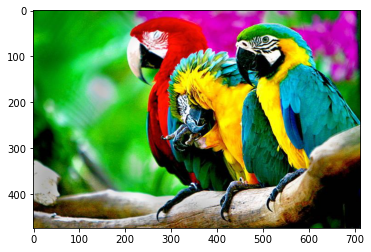

In [2]:
image = imread('parrots.jpg')
pylab.imshow(image)

In [3]:
image_norm = img_as_float(image).reshape(-1, 3)

In [4]:
kmeans = KMeans(init='k-means++', random_state = 241)

In [5]:
kmeans.fit(image_norm)

KMeans(random_state=241)

In [6]:
data = pd.DataFrame(image_norm, columns = ['R', 'G', 'B'])
data['Cluster'] = kmeans.labels_
data

,R,G,B,Cluster
0,0.015686,0.494118,0.019608,3
1,0.007843,0.494118,0.007843,3
2,0.007843,0.494118,0.007843,3
3,0.007843,0.494118,0.007843,3
4,0.007843,0.501961,0.011765,3
...,...,...,...,...
337957,0.000000,0.011765,0.007843,0
337958,0.000000,0.031373,0.035294,0
337959,0.023529,0.090196,0.117647,0
337960,0.082353,0.160784,0.203922,0


In [7]:
data_mean = data.groupby('Cluster').mean()
data_median = data.groupby('Cluster').median()

In [8]:
image_mean = data.copy()
image_median = data.copy()
for i in range(8): #we use 8 because n_clusters is 8 (default)
    image_mean.loc[image_mean['Cluster']==i, ['R', 'G', 'B']] = data_mean.loc[i].tolist()
    image_median.loc[image_median['Cluster']==i, ['R', 'G', 'B']] = data_median.loc[i].tolist()

In [9]:
mean_ratio = peak_signal_noise_ratio(image_norm, np.array(image_mean[['R', 'G', 'B']]))
mean_ratio

18.436728778310275

In [10]:
median_ratio = peak_signal_noise_ratio(image_norm, np.array(image_median[['R', 'G', 'B']]))
median_ratio

18.146655471791103

In [11]:
for k in range(1, 21):
    km = KMeans(n_clusters = k, init='k-means++', random_state = 241)
    km.fit(image_norm)
    
    img_clustered = pd.DataFrame(image_norm, columns = ['R', 'G', 'B'])
    img_clustered['Cluster'] = km.labels_
    
    mean_values = img_clustered.groupby('Cluster').mean()
    median_values = img_clustered.groupby('Cluster').median()
    
    img_mean = img_clustered.copy()
    img_median = img_clustered.copy()
    
    for i in tqdm(range(k)): #we use 8 because n_clusters is 8 (default)
        img_mean.loc[img_mean['Cluster']==i, ['R', 'G', 'B']] = mean_values.loc[i].tolist()
        img_median.loc[img_median['Cluster']==i, ['R', 'G', 'B']] = median_values.loc[i].tolist()
        
    metric_mean = peak_signal_noise_ratio(image_norm, np.array(img_mean[['R', 'G', 'B']]))
    metric_median = peak_signal_noise_ratio(image_norm, np.array(img_median[['R', 'G', 'B']]))
    
    if metric_mean > 20 or metric_median > 20:
        print('Result_for_mean: ', metric_mean)
        print('Result_for_median: ', metric_median)
        print('Number of clusters: ', k)
        break

100%|██████████| 11/11 [00:00<00:00, 46.33it/s]

Result_for_mean:  20.127208603378875
Result_for_median:  19.84625170662676
Number of clusters:  11
